# Visualizing the Franke function
In this notebook, we are going to make some plots of the Franke function with and without added noise. Visualization is of course an important part of the data science process: If we are to succeed in building a model that approximates some data, we need a clear picture of what the data looks like.

In [1]:
import os
os.sys.path.append(os.path.dirname(os.path.abspath('.')))
from src.data.generate_data import FrankeFunction
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)
z = FrankeFunction(x, y, noise=0.02, seed=43)

## Surface plot

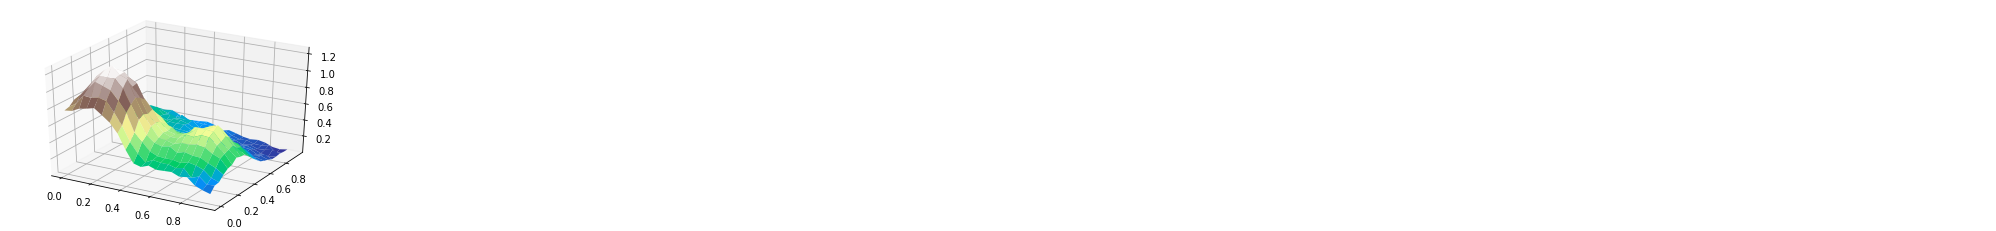

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap='terrain')
plt.savefig('../reports/figures/test.png')
plt.show()

## Contour plot

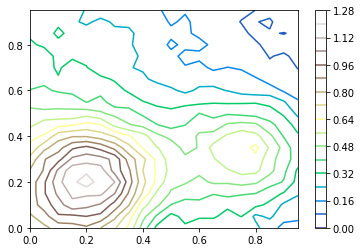

In [4]:
plt.contour(x, y, z, cmap = 'terrain', levels=18)
plt.colorbar()
plt.show()